<a href="https://colab.research.google.com/github/MBABHISHEK/jss-stu-ml-lab-exam/blob/main/5/5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

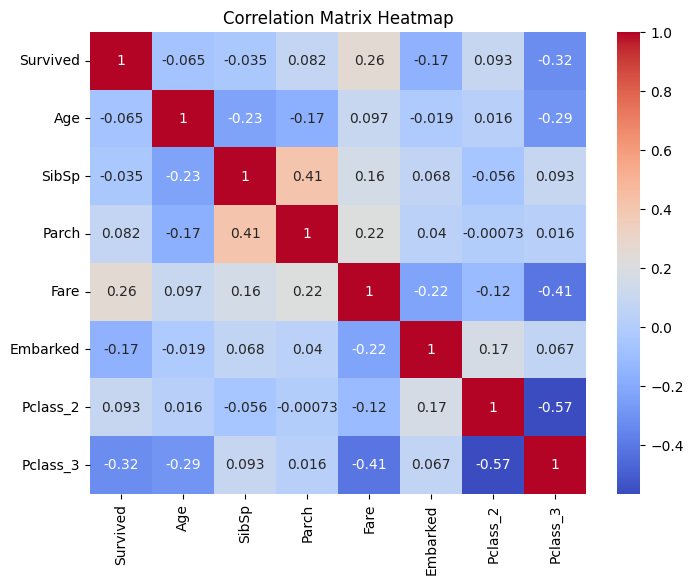

Confusion Matrix:
 [[78 27]
 [35 39]]
Accuracy: 0.6536312849162011


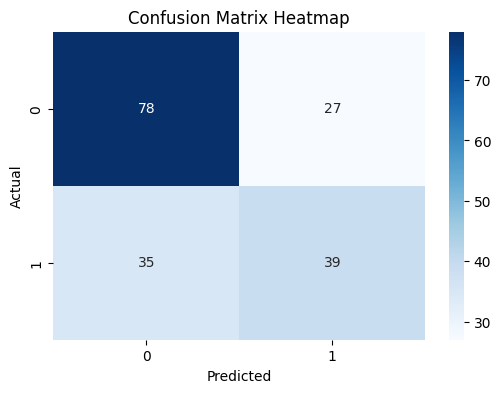

In [13]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("titanic.csv")
df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Handle missing values
imputer = SimpleImputer(strategy='median')
df[['Age', 'Fare']] = imputer.fit_transform(df[['Age', 'Fare']])

# Fill missing 'Embarked' values with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode 'Embarked' column
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Normalize numerical features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Encode the 'Pclass' column using one-hot encoding
df = pd.get_dummies(df, columns=['Pclass'], drop_first=True)

# Plot the correlation matrix heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Split the data into train and test sets
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Gaussian Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# without sklearn

In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

def calculate_prior(df, Y):
    # Calculate the prior probabilities P(Y)
    classes = sorted(list(df[Y].unique()))
    prior = [np.mean(df[Y] == c) for c in classes]
    return prior

def calculate_likelihood_gaussian(df, feature, x, Y, c):
    # Calculate the Gaussian likelihood P(X|Y)
    mean = df[feature][df[Y] == c].mean()
    std = df[feature][df[Y] == c].std()
    exponent = np.exp(-((x - mean) ** 2 / (2 * std ** 2)))
    return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

def naive_bayes_gaussian(df, X, Y):
    # Get feature names
    features = list(df.columns)[:-1]

    # Calculate prior probabilities
    prior = calculate_prior(df, Y)

    Y_pred = []
    # Loop over every data sample
    for x in X:
        # Calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1] * len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # Calculate posterior probability (numerator only)
        post_prob = [1] * len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

# Example usage
# Load your dataset (adjust the path to your actual CSV file)
df = pd.read_csv('titanic.csv')

# Select relevant columns
df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Handle missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[['Age', 'Fare']] = imputer.fit_transform(df[['Age', 'Fare']])
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Split the data into train and test sets
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to numpy array for iteration
X_train_np = X_train.values
X_test_np = X_test.values

# Train the model
predictions_train = naive_bayes_gaussian(df.iloc[:len(X_train)], X_train_np, 'Survived')

# Predict the classes for the test set
predictions_test = naive_bayes_gaussian(df.iloc[len(X_train):], X_test_np, 'Survived')

# Evaluate the model
accuracy = accuracy_score(y_test, predictions_test)
cm = confusion_matrix(y_test, predictions_test)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)


<ipython-input-11-740f8d333d24>:16: RuntimeWarning: divide by zero encountered in scalar divide
  exponent = np.exp(-((x - mean) ** 2 / (2 * std ** 2)))
<ipython-input-11-740f8d333d24>:17: RuntimeWarning: divide by zero encountered in scalar divide
  return (1 / (np.sqrt(2 * np.pi) * std)) * exponent
<ipython-input-11-740f8d333d24>:17: RuntimeWarning: invalid value encountered in scalar multiply
  return (1 / (np.sqrt(2 * np.pi) * std)) * exponent
<ipython-input-11-740f8d333d24>:16: RuntimeWarning: invalid value encountered in scalar divide
  exponent = np.exp(-((x - mean) ** 2 / (2 * std ** 2)))


Confusion Matrix:
 [[105   0]
 [ 74   0]]
Accuracy: 0.5865921787709497
